In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
%matplotlib inline
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

In [3]:
data = pd.read_csv('sunshine.csv')

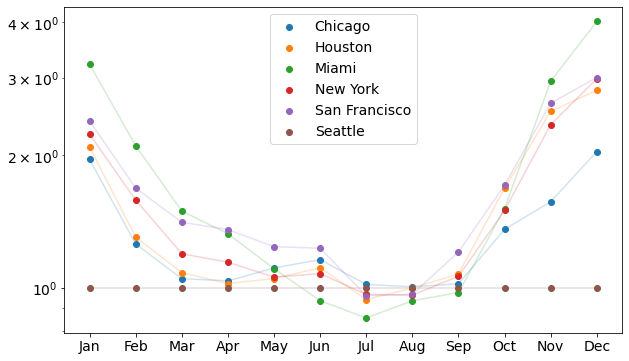

In [4]:
plt.figure(figsize=(10,6))
for city in data.city.unique():
    plt.semilogy(data.loc[data['city'] == city, 'month'], 
             (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
             alpha=.2)
    plt.scatter(data.loc[data['city'] == city, 'month'], 
             (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
             label=city)
    
plt.legend()


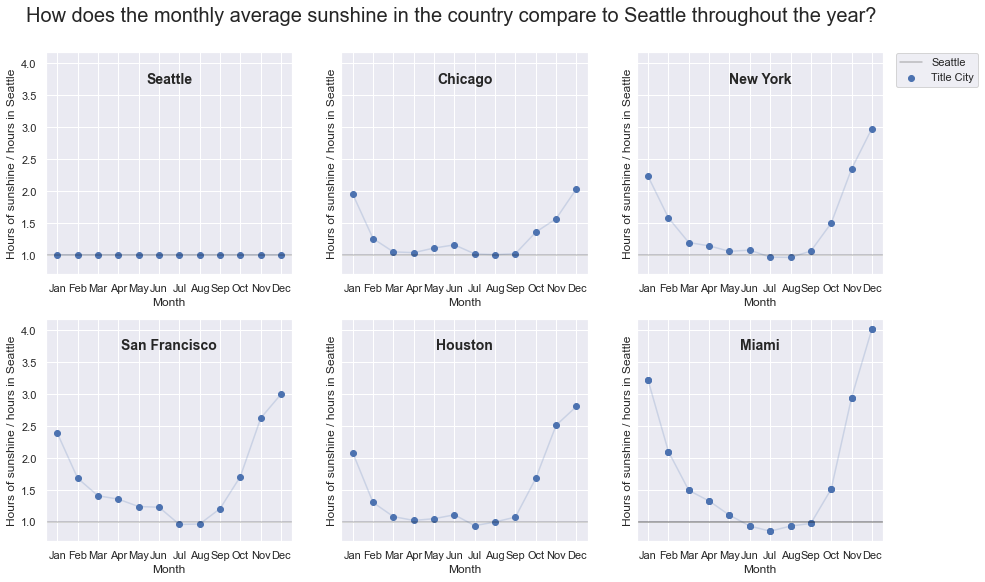

In [5]:
sns.set_theme()
fig, axs = plt.subplots(2, 3,figsize=(15,9),  sharey='all')
# Share both X and Y axes with all subplots
for ii, city in enumerate(['Seattle', 'Houston', 'New York', 'San Francisco', 'Chicago', 'Miami']):
    i = int(ii%2)
    j = int(ii%3)
    axs[i, j].plot(data.loc[data['city'] == city, 'month'], 
             (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
             alpha=.2)
    axs[i, j].scatter(data.loc[data['city'] == city, 'month'], 
             (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values)
    axs[i, j].axhline(1, color='k', alpha=.25)
    axs[i, j].set_title(city, y = .8333, weight='bold', fontsize=14)
    axs[i, j].set_xlabel('Month')
    axs[i, j].set_ylabel(r'Hours of sunshine / hours in Seattle')
    
axs[i, j].scatter(data.loc[data['city'] == city, 'month'], 
         (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
         label='Title City', color='b')
axs[i, j].axhline(1, color='k', alpha=.25, label='Seattle')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend( lines, labels, loc = 'lower center', bbox_to_anchor = (.45,.817,1,1),
            bbox_transform = plt.gcf().transFigure )
plt.suptitle('How does the monthly average sunshine in the country compare to Seattle throughout the year?', fontsize=20, y=.95)
plt.show()

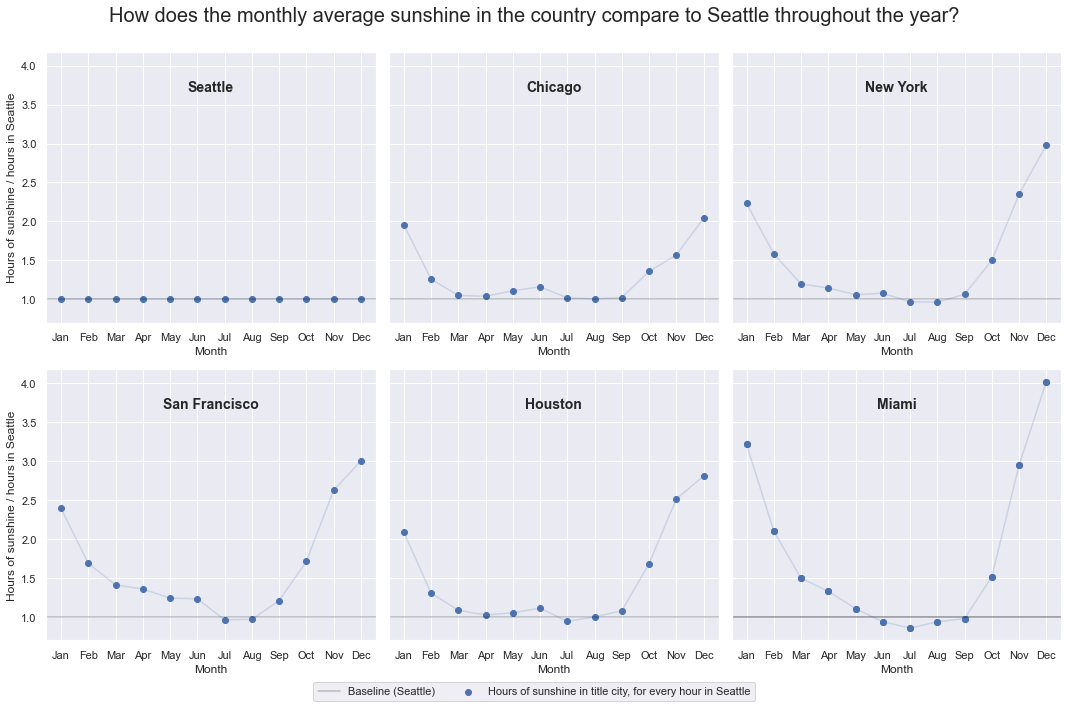

In [9]:
sns.set_theme()
fig, axs = plt.subplots(2, 3,figsize=(15,9),  sharey='all')
# Share both X and Y axes with all subplots
for ii, city in enumerate(['Seattle', 'Houston', 'New York', 'San Francisco', 'Chicago', 'Miami']):
    i = int(ii%2)
    j = int(ii%3)
    axs[i, j].plot(data.loc[data['city'] == city, 'month'], 
             (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
             alpha=.2)
    axs[i, j].scatter(data.loc[data['city'] == city, 'month'], 
             (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values)
    axs[i, j].axhline(1, color='k', alpha=.25)
    axs[i, j].set_title(city, y = .8333, weight='bold', fontsize=14)
    axs[i, j].set_xlabel('Month')
    if j == 0:
        axs[i, j].set_ylabel(r'Hours of sunshine / hours in Seattle')
    
axs[i, j].scatter(data.loc[data['city'] == city, 'month'], 
         (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
         label='Hours of sunshine in title city, for every hour in Seattle', color='b')
axs[i, j].axhline(1, color='k', alpha=.25, label='Baseline (Seattle)')
fig.tight_layout()
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend( lines, labels, loc = 'lower center', bbox_to_anchor = (0, -.03,1,1),
            bbox_transform = plt.gcf().transFigure, ncol=2)
plt.suptitle('How does the monthly average sunshine in the country compare to Seattle throughout the year?', fontsize=20, y=1.05)
plt.savefig()

In [96]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [95]:
pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [106]:
capitals

'https://vega.github.io/vega-datasets/data/us-state-capitals.json'

In [111]:
data.columns

Index(['city', 'lon', 'lat', 'month', 'monthnum', 'sunshine'], dtype='object')

In [114]:
import json

In [115]:
json.loads(data[['city', 'lon', 'lat']].drop_duplicates())

TypeError: the JSON object must be str, bytes or bytearray, not DataFrame

In [113]:
for city in 

,city,lon,lat
0,Chicago,-87.623177,41.881832
12,Houston,-95.358421,29.749907
24,Miami,-80.191788,25.761681
36,New York,-73.935242,40.730610
48,San Francisco,-122.446747,37.733795
60,Seattle,-122.335167,47.608013


In [118]:
json.(data.us_state_capitals.url)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [116]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='lightgray'
).properties(
    title='US State Capitols',
    width=650,
    height=400
).project('albersUsa')

# Points and text

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('city', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)


background + points + text

alt.LayerChart(...)

In [98]:
conda install altair

Solving environment: ...working... done

## Package Plan ##
Note: you may need to restart the kernel to use updated packages.


  environment location: C:\Users\ykwan\anaconda3

  added / updated specs:
    - altair


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         484 KB
    conda-4.10.0               |   py38haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  altair             pkgs/main/noarch::altair-4.1.0-py_1

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.0-py38haa95532_0




conda-4.10.0         | 2.9 MB    |            |   0% 
conda-4.10.0         | 2.9 MB    |            |   1% 
conda-4.10.0         | 2.9 MB    

In [100]:
conda install vega_datasets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ykwan\anaconda3

  added / updated specs:
    - vega_datasets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vega_datasets-0.7.0        |             py_0         325 KB
    ------------------------------------------------------------
                                           Total:         325 KB

The following NEW packages will be INSTALLED:

  vega_datasets      pkgs/main/noarch::vega_datasets-0.7.0-py_0




vega_datasets-0.7.0  | 325 KB    |            |   0% 
vega_datasets-0.7.0  | 325 KB    | #4         |  15% 
vega_datasets-0.7.0  | 325 KB    | ########## | 100% 
vega_datasets-0.7.0  | 325 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to 